# Visualizing the Role of the Covariance Matrix in Multivariate Gaussian Distributions

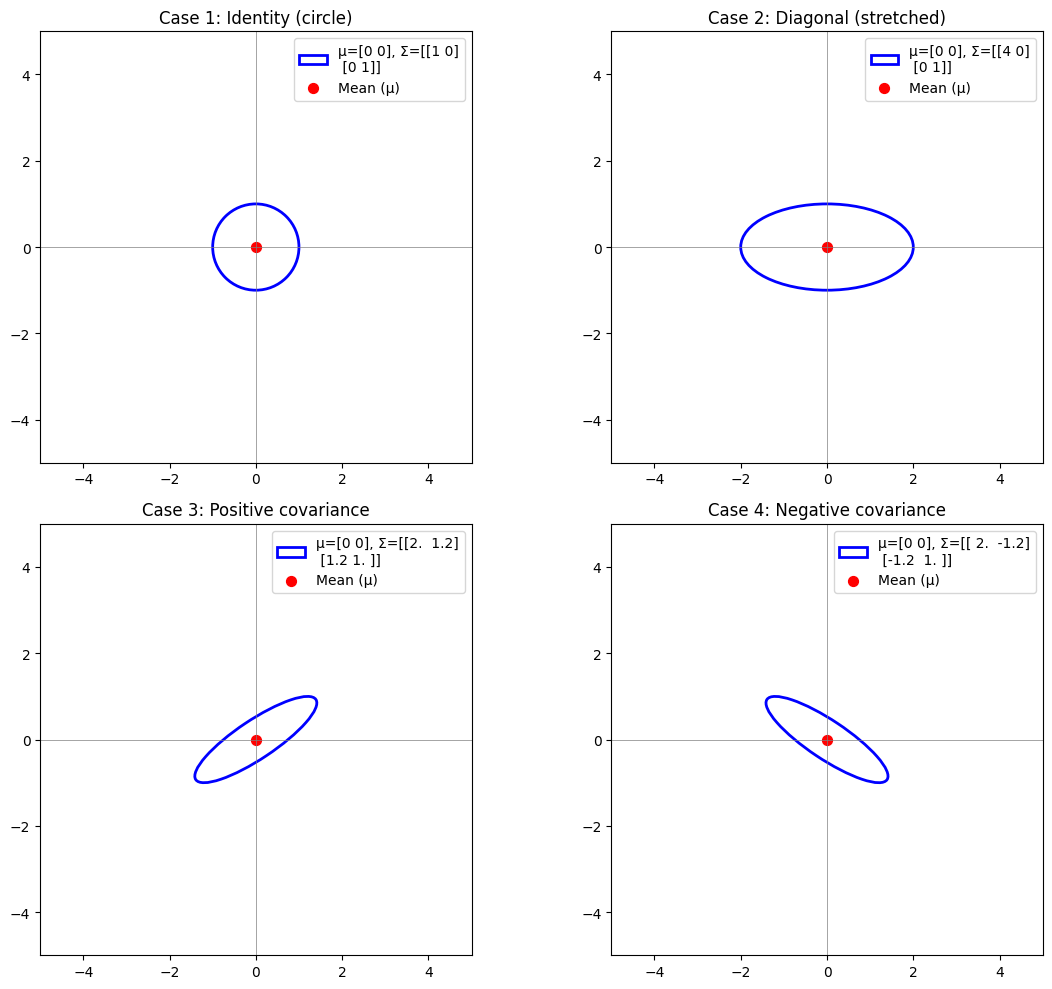

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Function to plot a 2D Gaussian ellipse given mean and covariance matrix
def plot_gaussian_ellipse(ax, mu, Sigma, color='blue', label=None):
    eigenvalues, eigenvectors = np.linalg.eigh(Sigma)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

    width, height = 2 * np.sqrt(eigenvalues)  # 1 std deviation
    ellipse = Ellipse(xy=mu, width=width, height=height, angle=angle,
                      edgecolor=color, fc='None', lw=2, label=label)
    ax.add_patch(ellipse)

# Different covariance matrix cases
mu = np.array([0, 0])

cov_cases = {
    "Case 1: Identity (circle)": np.array([[1, 0], [0, 1]]),
    "Case 2: Diagonal (stretched)": np.array([[4, 0], [0, 1]]),
    "Case 3: Positive covariance": np.array([[2, 1.2], [1.2, 1]]),
    "Case 4: Negative covariance": np.array([[2, -1.2], [-1.2, 1]])
}

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (title, Sigma) in zip(axes, cov_cases.items()):
    ax.set_title(title)
    plot_gaussian_ellipse(ax, mu, Sigma, label=f'μ={mu}, Σ={Sigma}')
    ax.scatter(*mu, color='red', s=50, label='Mean (μ)')
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.legend()

plt.tight_layout()
plt.show()


# Visualizing the Role of the Covariance Matrix with changing Mean vector in Multivariate Gaussian Distributions

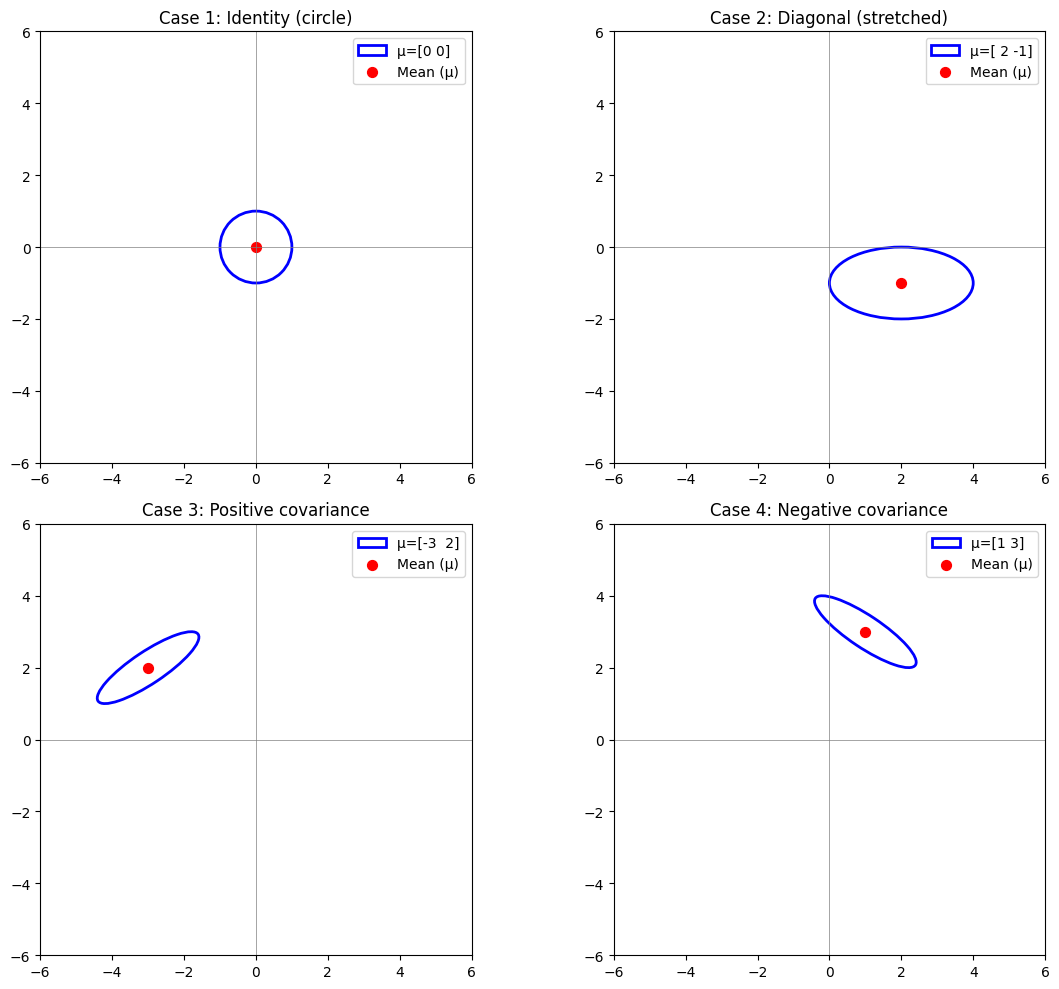

In [4]:
# Define new mean vectors for each case
mean_vectors = {
    "Case 1: Identity (circle)": np.array([0, 0]),
    "Case 2: Diagonal (stretched)": np.array([2, -1]),
    "Case 3: Positive covariance": np.array([-3, 2]),
    "Case 4: Negative covariance": np.array([1, 3])
}

# Plotting again with custom mean vectors
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (title, Sigma) in zip(axes, cov_cases.items()):
    mu = mean_vectors[title]
    ax.set_title(title)
    plot_gaussian_ellipse(ax, mu, Sigma, label=f'μ={mu}')
    ax.scatter(*mu, color='red', s=50, label='Mean (μ)')
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_aspect('equal')
    ax.legend()

plt.tight_layout()
plt.show()


# Understanding this in 3D

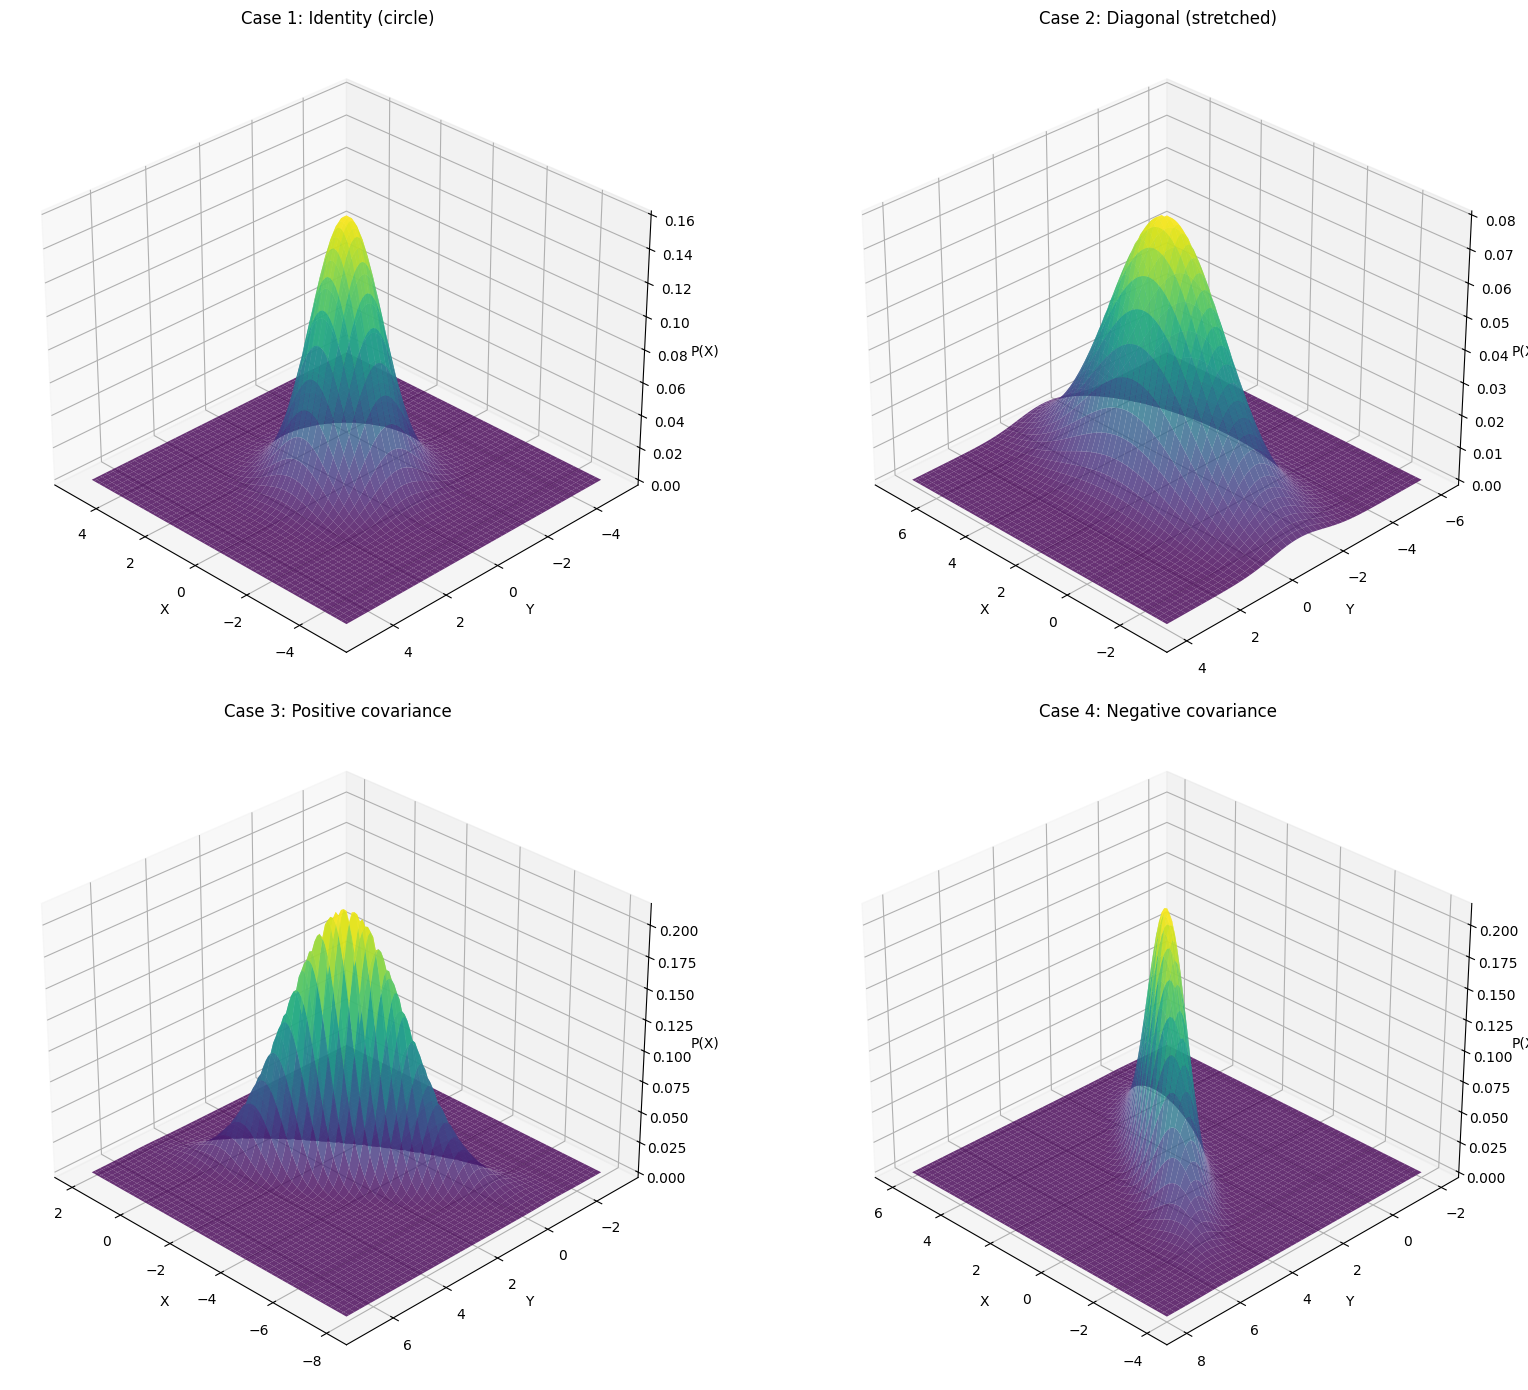

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Function to plot a 3D multivariate Gaussian
def plot_3d_gaussian(mu, Sigma, ax, title):
    x = np.linspace(mu[0] - 5, mu[0] + 5, 100)
    y = np.linspace(mu[1] - 5, mu[1] + 5, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    
    rv = multivariate_normal(mean=mu, cov=Sigma)
    Z = rv.pdf(pos)
    
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('P(X)')
    ax.view_init(elev=30, azim=135)

# Plotting 3D surfaces for each case
fig = plt.figure(figsize=(18, 14))

for i, (title, Sigma) in enumerate(cov_cases.items()):
    mu = mean_vectors[title]
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    plot_3d_gaussian(mu, Sigma, ax, title)

plt.tight_layout()
plt.show()


In [21]:
%matplotlib notebook

In [27]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D

# Set initial parameters
initial_mu = [0, 0]
initial_sigma = [[1, 0], [0, 1]]

# Create mesh grid
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Initial PDF
rv = multivariate_normal(mean=initial_mu, cov=initial_sigma)
Z = rv.pdf(pos)

# Create plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none', alpha=0.9)
ax.set_zlim(0, 0.25)
ax.set_title("3D Multivariate Normal with Sliders")

# Slider axes
axcolor = 'lightgoldenrodyellow'
ax_mu_x = plt.axes([0.2, 0.02, 0.65, 0.02], facecolor=axcolor)
ax_mu_y = plt.axes([0.2, 0.05, 0.65, 0.02], facecolor=axcolor)
ax_var_x = plt.axes([0.2, 0.08, 0.65, 0.02], facecolor=axcolor)
ax_var_y = plt.axes([0.2, 0.11, 0.65, 0.02], facecolor=axcolor)
ax_cov_xy = plt.axes([0.2, 0.14, 0.65, 0.02], facecolor=axcolor)

# Sliders
s_mu_x = Slider(ax_mu_x, 'μ₁', -5.0, 5.0, valinit=0)
s_mu_y = Slider(ax_mu_y, 'μ₂', -5.0, 5.0, valinit=0)
s_var_x = Slider(ax_var_x, 'σ₁²', 0.1, 5.0, valinit=1)
s_var_y = Slider(ax_var_y, 'σ₂²', 0.1, 5.0, valinit=1)
s_cov_xy = Slider(ax_cov_xy, 'Cov(1,2)', -4.9, 4.9, valinit=0)

# Update function
def update(val):
    mu = [s_mu_x.val, s_mu_y.val]
    cov = [[s_var_x.val, s_cov_xy.val], [s_cov_xy.val, s_var_y.val]]
    
    try:
        rv = multivariate_normal(mean=mu, cov=cov)
        Z = rv.pdf(pos)
        ax.clear()
        ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none', alpha=0.9)
        ax.set_zlim(0, 0.25)
        ax.set_title("3D Multivariate Normal with Sliders")
    except np.linalg.LinAlgError:
        pass  # skip invalid covariance matrix

# Link sliders to update|
s_mu_x.on_changed(update)
s_mu_y.on_changed(update)
s_var_x.on_changed(update)
s_var_y.on_changed(update)
s_cov_xy.on_changed(update)

plt.show()


<IPython.core.display.Javascript object>